In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

In [2]:
# import imgaug as ia
# from imgaug import augmenters as iaa

In [3]:
import pandas as pd
import os
import sys
from datetime import datetime
import time
from pprint import pprint

In [4]:
# attention
am_I_using_colab = False

In [5]:
# if am_I_using_colab:
#     !pip install -U tensorflow-addons
    
# import tensorflow_addons as tfa
# import tqdm

In [6]:
# plt.ioff()  # interactive mode off
# plt.ion()  # interactive mode on

# %pylab inline

np.random.seed(1728)
# ia.random.seed(1728)

In [7]:
if am_I_using_colab:
    ###
    from google.colab import drive
    drive.mount('/content/drive')

    print(os.getcwd())
    print(os.listdir())

    ###
    temp_dir = '/content/temp'
    try:
        os.mkdir(temp_dir)
    except:
        pass
    print(os.listdir(temp_dir))

    ###
    dataset_filepath = f'{temp_dir:s}/dataset_v1.7z'
    import gdown
    gdown.download(
        r'https://drive.google.com/uc?id=15kAUrJvaJy54xoXIwPZqtkBQGccjOR5k',
        output=dataset_filepath,
        quiet=False,
        )

    ###
    !pip install py7zr
    import py7zr
    with py7zr.SevenZipFile(dataset_filepath, 'r') as archive:
        archive.extractall(path="./dataset_v1")

    ###


In [8]:
import time

def mulai_hitung_waktu():
    global waktu_mulai
    waktu_mulai = time.time()

def cetak_lama_waktu():
    global waktu_mulai
    hasil_detik = abs(waktu_mulai - time.time())
    hasil_milidetik = hasil_detik * 1000
    
    menit = hasil_detik / 60
    detik = hasil_detik % 60
    
    menit_detik = str(int(menit)) + 'm' + ':' + str(int(detik)) + 's'
    
    print('-----\n(%.2f ms) == (%s)\n-----' % (hasil_milidetik, menit_detik))
    del waktu_mulai


# cara pakai
# ----------
mulai_hitung_waktu()  ###

time.sleep(100/1000)  # time-consuming computing here

cetak_lama_waktu()  ###

-----
(113.01 ms) == (0m:0s)
-----


In [9]:
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print("Num GPUs Available: %d Physical GPUs, %d Logical GPU" % (len(gpus), len(logical_gpus)))
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)

Num GPUs Available: 1 Physical GPUs, 1 Logical GPU


In [10]:
if am_I_using_colab:
    WORK_DIR = '/content'
    TRAIN_SET_PATH = f'{WORK_DIR}/dataset_v1'
    # TEST_SET_PATH = f''

    DRIVE_DIR = '/content/drive/MyDrive/MyNotebook/MySkripsi'
    CHECKPOINTS_DIR = f'{WORK_DIR}/checkpoints'
    FINAL_EPOCH_DIR = f'{WORK_DIR}/weights and models'

else:
    WORK_DIR = r'D:\MaskTheFace\datasets\_temp'
    TRAIN_SET_PATH = r'D:\MaskTheFace\datasets\_temp\_v1'
    TEST_SET_PATH = r'D:\MaskTheFace\datasets\_temp\_v1 - test only'

    CHECKPOINTS_DIR = r'D:\MaskTheFace\datasets\_temp\checkpoints'
    FINAL_EPOCH_DIR = r'D:\MaskTheFace\datasets\_temp\weights and models'

directories = [
    CHECKPOINTS_DIR,
    FINAL_EPOCH_DIR
]

for dir in directories:
    print(dir)
    try:
        os.mkdir(dir)
        print('success')
    except FileExistsError:
        print('exist')
    except:
        print('error')

# Set working directory
os.chdir(WORK_DIR)

print('current work dir:')
print(os.getcwd())
print()
print('listdir WORK_DIR:')
pprint(os.listdir('./'))

D:\MaskTheFace\datasets\_temp\checkpoints
exist
D:\MaskTheFace\datasets\_temp\weights and models
exist
current work dir:
D:\MaskTheFace\datasets\_temp

listdir WORK_DIR:
['1st_verbose.lenet5_actual_rm-128-16.txt',
 '2nd_verbose.lenet5_actual_rm-32-32.txt',
 'Augmented Images - Masked',
 'Augmented Images - Masked.zip',
 'Augmented Images - Unmasked',
 'Augmented Images - Unmasked.zip',
 'checkpoints',
 'elite_verbose.lenet5_actual_rm-128-32.txt',
 'LeNet-5 model summary.xlsx',
 'main, train set - crop masked resized',
 'main, train set - crop masked resized.zip',
 'main, train set - crop resized',
 'main, train set - crop resized.zip',
 'MobileNetV2 model summary.xlsx',
 'model.png',
 'note.txt',
 'thumbnails - augmented masked.zip',
 'thumbnails - augmented unmasked.zip',
 'upnvj_verbose.lenet5_actual_rm-128-64.txt',
 'weights and models',
 'weights and models - 1st.elite.raihan.7z',
 'weights and models - 2nd.elite.raihan.7z',
 'weights and models - @upnvj.ac.id.7z',
 'weights and mo

In [11]:
names = os.listdir(TRAIN_SET_PATH)

length_dict = {}
for name in names:
    samples = f'{TRAIN_SET_PATH:s}/{name:s}'
    length_dict[name] = len(os.listdir(samples))

n_min = min(length_dict.values())
n_max = max(length_dict.values())
n_sum = sum(length_dict.values())

print(f'{len(names):d} names')
display(length_dict)
print(f"max: {n_min:d}")
print(f"min: {n_max:d}")
print(f"total: {n_sum:d}")

# del n_min, n_max, n_sum, length_dict

12 names


{'Andhika': 1260,
 'Ardiyan': 1260,
 'Artik': 1260,
 'Ballya': 1260,
 'Bina': 1260,
 'Buyung': 1260,
 'Kresna': 1260,
 'Mhartian': 1260,
 'RaihanA': 1260,
 'Syifa': 1260,
 'Taufik': 1260,
 'Yandi': 1260}

max: 1260
min: 1260
total: 15120


In [12]:
validation_split = 0.4
total_train = round(n_sum * (1 - validation_split))
total_val = n_sum - total_train

print(f'train images: {total_train:d}')
print(f'validation images: {total_val:d}')

train images: 9072
validation images: 6048


In [16]:
model = keras.applications.MobileNetV2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(96, 96, 3),  # recommended  because trained in (224, 224, 3) ImageNet
    alpha=1.0,  # network width multiplier, default 1.0 in the MobileNetV2 paper
    include_top=True)  # Do not include the ImageNet classifier at the top.

14540800/14536120 [==============================] - 5s 0us/step


In [19]:
model.summary(line_length=120, positions=[52, 73, 85, 120])

Model: "mobilenetv2_1.00_96"
________________________________________________________________________________________________________________________
Layer (type)                                        Output Shape         Param #     Connected to                       
input_2 (InputLayer)                                [(None, 96, 96, 3)]  0                                              
________________________________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)                           (None, 97, 97, 3)    0           input_2[0][0]                      
________________________________________________________________________________________________________________________
Conv1 (Conv2D)                                      (None, 48, 48, 32)   864         Conv1_pad[0][0]                    
________________________________________________________________________________________________________________________
bn_

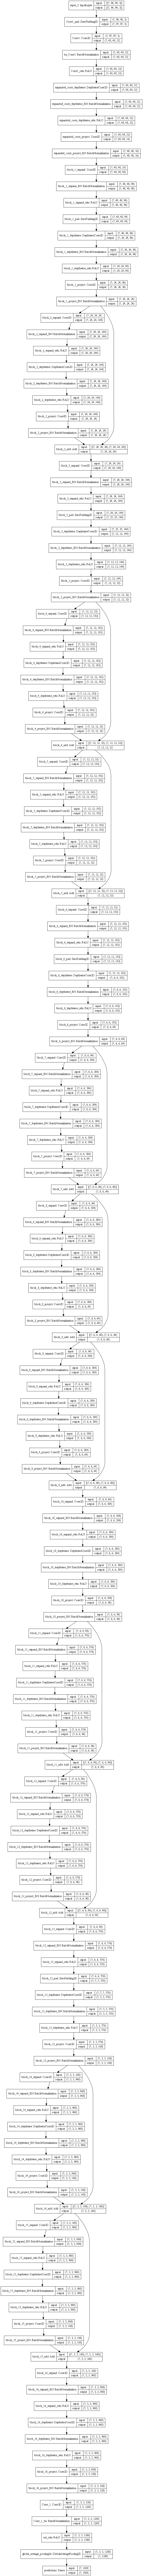

In [18]:
model_viz = tf.keras.utils.plot_model(
    model,
    # to_file=saved_model_name + '.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',  # 'TB' (top-bottom)  'LR' (left-right)
    expand_nested=True,
    dpi=72
    )

display(model_viz)

del model_viz